In [7]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [2]:
X, y = mglearn.datasets.make_forge()

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X shape: (26, 2)


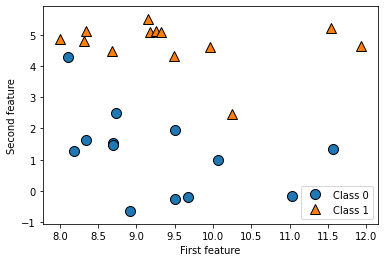

In [10]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print(f"X shape: {X.shape}")

In [13]:
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

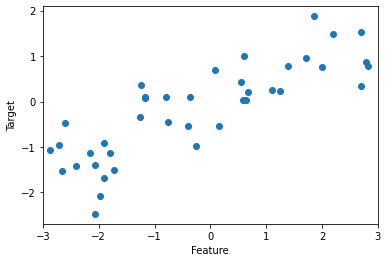

In [35]:
plt.plot(X, y, 'o')
plt.xlim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'cancer keys: {cancer.keys()}')

cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [43]:
print(cancer['data'].shape)

(569, 30)


In [50]:
print(f'sample counts per class:\n{ {k:v for k, v in zip(cancer.target_names, np.bincount(cancer.target))}}')

sample counts per class:
{'malignant': 212, 'benign': 357}


In [53]:
print(f'feature names:\n{cancer.feature_names}')

feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [54]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(f"data shape: {boston_dataset.data.shape}")

data shape: (506, 13)


In [56]:
X, y = mglearn.datasets.load_extended_boston()

In [57]:
print(f'data_shape: {X.shape}')

data_shape: (506, 104)


c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


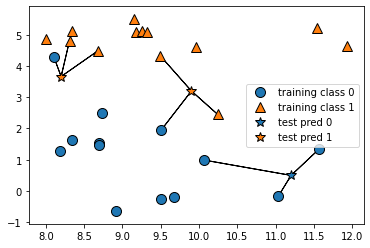

In [62]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [64]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [107]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [108]:
print('test set predictions:', clf.predict(X_test))

test set predictions: [1 0 1 0 1 0 0]


In [109]:
print('test set accuracy: ', clf.score(X_test, y_test)')

test set accuracy: 0.8571428571428571


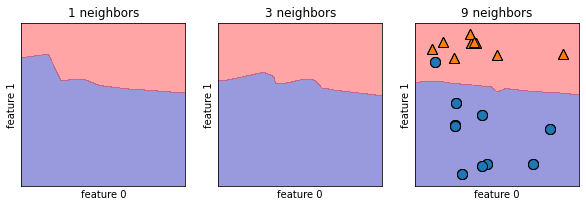

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
    ax.set_title(f"{n_neighbors} neighbors")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

In [123]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 66)

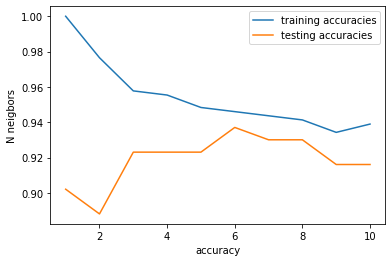

In [130]:
tr_accuracies = []
te_accuracies = []
nn = range(1, 11)
for n in nn:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    tr_accuracies.append(clf.score(X_train, y_train))
    te_accuracies.append(clf.score(X_test, y_test))

plt.plot(nn, tr_accuracies, label='training accuracies')
plt.plot(nn, te_accuracies, label='testing accuracies')
plt.xlabel('accuracy')
plt.ylabel('N neigbors')
plt.legend(loc=1)

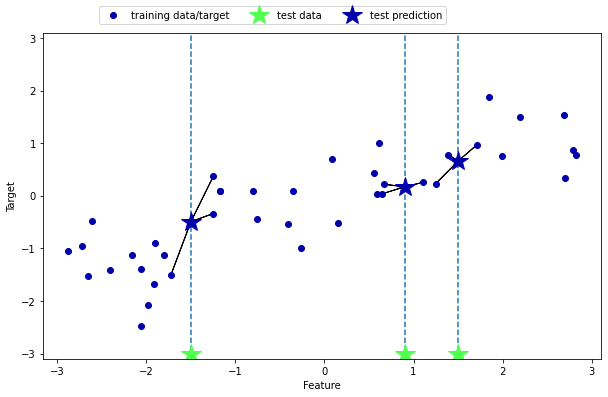

In [134]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [135]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [141]:
print("test set prediction: ", reg.predict(X_test), sep='\n')

test set prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [138]:
print('test set R^2: ', reg.score(X_test, y_test))

test set R^2:  0.8344172446249605


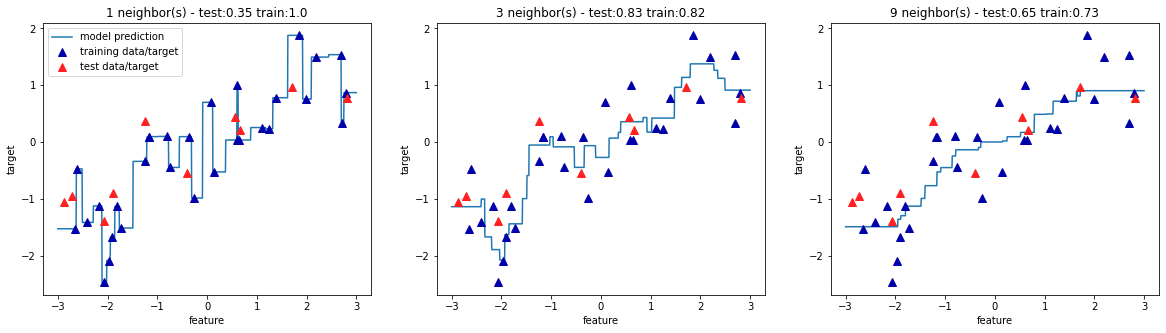

In [154]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, '^', c=mglearn.cm2(1), markersize=8)
    ax.set_title(f"{n} neighbor(s) - test:{round(reg.score(X_test, y_test), 2)}"
                 f" train:{round(reg.score(X_train, y_train), 2)}")
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(["model prediction", "training data/target", "test data/target"], loc="best")
    
    